<font size = "4">**Different ML models for sign detection using features derived from hand detection module built upon MediaPipe package**</font>

**Importing modules and defining paths/feature names**


In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

path = r'C:\Users\graeb\OneDrive\Pulpit\sign_csv\train.csv'
features = ['thumb_bend', 'index_bend', 'middle_bend', 'ring_bend', 'little_bend', 'thumb_spread', 'index_spread', 'middle_spread', 'ring_spread']
df = pd.read_csv(path)
df

,label,thumb_bend,index_bend,middle_bend,ring_bend,little_bend,thumb_spread,index_spread,middle_spread,ring_spread
0,b,162.247300,172.488797,176.519942,177.652370,177.426977,0.096251,6.916987,6.436602,8.443418
1,b,164.792596,173.971061,176.154901,178.021476,178.803472,2.221859,6.882769,6.072881,8.295965
2,b,161.310166,172.205231,175.423859,178.667964,175.712530,1.666265,6.706849,6.365716,8.496984
3,b,158.191213,172.692990,175.728887,177.313664,178.871263,0.242302,6.729412,5.943637,8.306869
4,b,161.847468,172.930975,174.175864,174.327692,175.668407,0.287475,7.005205,6.027073,7.945447
...,...,...,...,...,...,...,...,...,...,...
720,f,163.468366,133.648137,165.574654,165.614698,171.508321,23.675509,17.649352,12.411986,15.442603
721,f,166.808678,145.778988,167.069073,165.754794,170.696216,25.922525,17.163132,12.888064,16.879301
722,f,166.089192,138.572631,165.797793,165.573143,170.572849,21.786972,16.252179,12.412010,15.723950
723,f,166.476227,140.206961,166.579151,165.446329,170.122211,24.217625,16.961506,12.414062,15.945269


In [2]:
feature_vector = df[features]
labels = df['label']
# neigh = KNeighborsClassifier(n_neighbors=3)
feature_vector.head(5)
# labels.head(5)

,thumb_bend,index_bend,middle_bend,ring_bend,little_bend,thumb_spread,index_spread,middle_spread,ring_spread
0,162.247300,172.488797,176.519942,177.652370,177.426977,0.096251,6.916987,6.436602,8.443418
1,164.792596,173.971061,176.154901,178.021476,178.803472,2.221859,6.882769,6.072881,8.295965
2,161.310166,172.205231,175.423859,178.667964,175.712530,1.666265,6.706849,6.365716,8.496984
3,158.191213,172.692990,175.728887,177.313664,178.871263,0.242302,6.729412,5.943637,8.306869
4,161.847468,172.930975,174.175864,174.327692,175.668407,0.287475,7.005205,6.027073,7.945447


In [3]:
len_items, len_cols = df.shape

<font size = '3'>**splitting dataset**</font>

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.sort_index().tail(10)

,label,thumb_bend,index_bend,middle_bend,ring_bend,little_bend,thumb_spread,index_spread,middle_spread,ring_spread
712,f,172.047380,138.134653,178.881022,174.731706,173.794812,16.013919,19.088484,12.872401,12.829815
713,f,173.584201,138.468328,177.925762,175.764025,175.110687,19.060096,16.905615,12.002716,11.669036
714,f,176.258513,166.621472,170.060013,171.802925,174.215355,8.243385,9.256681,9.151114,8.707108
715,f,161.498352,137.302864,167.108932,169.322743,171.985651,17.571105,14.832383,10.271852,10.132498
716,f,166.309550,128.304614,168.785414,166.523136,171.646980,19.455287,14.162886,10.259962,11.701286
717,f,165.591486,124.131065,169.273328,166.790263,172.474182,18.037947,14.542943,10.492907,11.532975
718,f,163.330020,119.084954,171.523972,168.196142,172.949939,19.248857,14.860495,11.036504,11.670892
719,f,162.608922,152.291500,175.108249,174.555602,174.947388,19.586168,15.143428,11.498692,11.766754
722,f,166.089192,138.572631,165.797793,165.573143,170.572849,21.786972,16.252179,12.412010,15.723950
724,f,171.294534,142.151911,141.717816,140.671642,140.391872,30.379155,11.043518,10.048343,11.418366


In [5]:
train_set.describe()

,thumb_bend,index_bend,middle_bend,ring_bend,little_bend,thumb_spread,index_spread,middle_spread,ring_spread
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,157.207167,110.978954,100.379544,102.782588,107.486363,10.988343,8.551688,7.648480,8.064209
std,19.128696,59.666358,64.389932,63.385104,61.664071,11.196713,3.206436,2.570633,2.767624
min,104.930244,0.188187,0.477363,0.051530,1.124065,0.000447,0.263289,0.036900,0.145761
25%,141.461687,53.292872,25.814626,28.675634,38.052713,2.079468,6.656708,6.606079,7.039233
50%,164.021410,132.015087,125.244630,129.673137,132.556268,6.569038,8.392520,7.937991,8.142323
75%,173.552936,167.974255,159.990153,163.769014,168.201143,18.068787,10.428646,9.016144,9.735328
max,179.994623,179.627921,179.995984,179.942629,179.981522,62.638500,20.333896,15.491175,16.744704


<font size = "4">**Scaling dataset values**</font>

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler


train_set_features = train_set[features]
train_set_labels = train_set['label']
test_set_features = test_set[features]
test_set_labels = test_set['label']

train_set_labels_enc = train_set_labels.replace(['a','b','c','d','e','f'],[0,1,2,3,4,5])
test_set_labels_enc = test_set_labels.replace(['a','b','c','d','e','f'],[0,1,2,3,4,5])

# normalize
train_set_norm = normalize(train_set_features, copy=True)
df_normalized = pd.DataFrame(train_set_norm)
# df_normalized.head(10)

# StandardScaler
scaler = StandardScaler()
scaler_model = pd.DataFrame(columns=features)
scaler_model = scaler.fit_transform(train_set_features)
df_scaler = pd.DataFrame(scaler_model)
# df_scaler

# MinMaxScaler
mmscaler = MinMaxScaler()
mmscaler_model = pd.DataFrame(columns=features)
mmscaler_model = mmscaler.fit_transform(train_set_features)
df_mmscaler = pd.DataFrame(mmscaler_model)
df_mmscaler.columns = features
mmscaler_model_test = mmscaler.fit_transform(test_set_features)
df_mmscaler_test = pd.DataFrame(mmscaler_model_test)
df_mmscaler_test.columns = features
test_set_features_scaled = df_mmscaler_test
df_mmscaler_test.head(10)
# df_mmscaler_test.info()
# df_mmscaler.describe()

,thumb_bend,index_bend,middle_bend,ring_bend,little_bend,thumb_spread,index_spread,middle_spread,ring_spread
0,0.946627,0.782846,0.646804,0.667940,0.712138,0.196299,0.257596,0.363441,0.234247
1,0.340604,0.140604,0.191276,0.162365,0.188960,0.067819,0.386474,0.564434,0.358542
2,0.798032,0.139572,0.122902,0.012895,0.039637,0.054692,0.082938,0.107324,0.200862
3,0.268578,0.947321,0.963356,0.975488,0.984057,0.017398,0.471181,0.525221,0.451970
4,0.661599,0.286128,0.154642,0.160208,0.192417,0.023530,0.302092,0.485457,0.338782
5,0.794966,0.781265,0.929425,0.925438,0.946239,0.268246,0.862590,0.856691,0.809615
6,0.828714,0.988455,0.987917,0.999420,0.999687,0.001031,0.423233,0.515414,0.464820
7,0.311452,0.831940,0.901797,0.895483,0.765629,0.000110,0.599294,0.721800,0.517906
8,0.990887,0.805443,0.712157,0.714786,0.744042,0.383723,0.354335,0.350171,0.193327
9,0.131046,0.961426,0.146372,0.108833,0.165337,0.073425,0.534220,0.694440,0.400072


<font size = "4">**Fitting and testing different models**</font>

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid

knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
ada = AdaBoostClassifier()
svc = SVC()
centroid = NearestCentroid()
knn_cv, tree_cv, forest_cv, ada_cv, svc_cv, centroid_cv = [None,None,None,None,None,None]
models = [knn,tree,forest,ada,svc,centroid]
models_cv = [knn_cv, tree_cv, forest_cv, ada_cv, svc_cv, centroid_cv]

parameters_knn = {'n_neighbors':[1,3,5,10], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2]}
parameters_tree = {'criterion': ['gini', 'entropy', 'log_loss'], 'random_state': [42]}
parameters_forest = {'n_estimators':[10,50,100], 'criterion': ['gini', 'entropy', 'log_loss'], 'random_state': [42]}
parameters_ada = {'n_estimators':[10,25,50,100], 'learning_rate': [0.2,0.5,0.8,1.0,1.2], 'random_state': [42]}
parameters_svc = {'C':[1.0,0.1,0.01], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'random_state': [42]}
parameters_centroid = {'metric': ['euclidean']}
parameters = [parameters_knn, parameters_tree, parameters_forest, parameters_ada, parameters_svc, parameters_centroid]
results_params = []
results_scores = []

for model_cv, model, parameter in zip(models_cv, models, parameters):
    model_cv = GridSearchCV(model, parameter)
    model_cv.fit(df_mmscaler, train_set_labels_enc)
    results_params.append(model_cv.best_params_)
    results_scores.append(model_cv.best_score_)


C:\Users\graeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\graeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\graeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\graeb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", li

In [11]:
print(results_params, results_scores)

[{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}, {'criterion': 'gini', 'random_state': 42}, {'criterion': 'entropy', 'n_estimators': 50, 'random_state': 42}, {'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 42}, {'C': 1.0, 'kernel': 'poly', 'random_state': 42}, {'metric': 'euclidean'}] [0.9137931034482758, 0.8827586206896552, 0.9206896551724139, 0.8293103448275861, 0.9, 0.8310344827586207]


In [15]:
from sklearn.metrics import f1_score

_knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 1, p= 1)
_tree = DecisionTreeClassifier(criterion= 'gini', random_state= 42)
_forest = RandomForestClassifier(criterion= 'entropy', n_estimators= 50, random_state= 42)
_ada = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 100, random_state= 42)
_svc = SVC(C= 1.0, kernel= 'poly', random_state= 42)
_centroid = NearestCentroid()

_knn.fit(df_mmscaler, train_set_labels_enc)
_tree.fit(df_mmscaler, train_set_labels_enc)
_forest.fit(df_mmscaler, train_set_labels_enc)
_ada.fit(df_mmscaler, train_set_labels_enc)
_svc.fit(df_mmscaler, train_set_labels_enc)
_centroid.fit(df_mmscaler, train_set_labels_enc)

_knn_pred = _knn.predict(test_set_features_scaled)
_tree_pred = _tree.predict(test_set_features_scaled)
_forest_pred = _forest.predict(test_set_features_scaled)
_ada_pred = _ada.predict(test_set_features_scaled)
_svc_pred = _svc.predict(test_set_features_scaled)
_centroid_pred = _centroid.predict(test_set_features_scaled)

_knn_f1 = f1_score(test_set_labels_enc, _knn_pred, average = 'micro')
_tree_f1 = f1_score(test_set_labels_enc, _tree_pred, average = 'micro')
_forest_f1 = f1_score(test_set_labels_enc, _forest_pred, average = 'micro')
_ada_f1 = f1_score(test_set_labels_enc, _ada_pred, average = 'micro')
_svc_f1 = f1_score(test_set_labels_enc, _svc_pred, average = 'micro')
_centroid_f1 = f1_score(test_set_labels_enc, _centroid_pred, average = 'micro')

print('F1 score for KNN = ',_knn_f1)
print('F1 score for Decision Tree = ',_tree_f1)
print('F1 score for Random Forest = ',_forest_f1)
print('F1 score for AdaBoost = ',_ada_f1)
print('F1 score for SVM classifier = ',_svc_f1)
print('F1 score for nearest Centroid = ',_centroid_f1)

F1 score for KNN =  0.9517241379310345
F1 score for Decision Tree =  0.7931034482758621
F1 score for Random Forest =  0.9103448275862069
F1 score for AdaBoost =  0.8344827586206898
F1 score for SVM classifier =  0.8827586206896552
F1 score for nearest Centroid =  0.8137931034482757


In [16]:
from sklearn.metrics import confusion_matrix

confusion_knn = confusion_matrix(test_set_labels_enc, _knn_pred)
confusion_tree = confusion_matrix(test_set_labels_enc, _tree_pred)
confusion_forest = confusion_matrix(test_set_labels_enc, _forest_pred)
confusion_ada = confusion_matrix(test_set_labels_enc, _ada_pred)
confusion_svc = confusion_matrix(test_set_labels_enc, _svc_pred)
confusion_centroid = confusion_matrix(test_set_labels_enc, _centroid_pred)

*Different ways of ploting a confusion matrix*

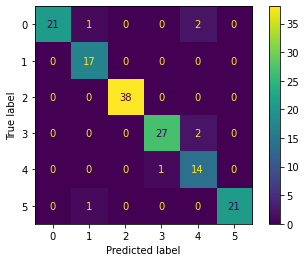

In [18]:
# Method 1 - using sklearn ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set_labels_enc, _knn_pred)

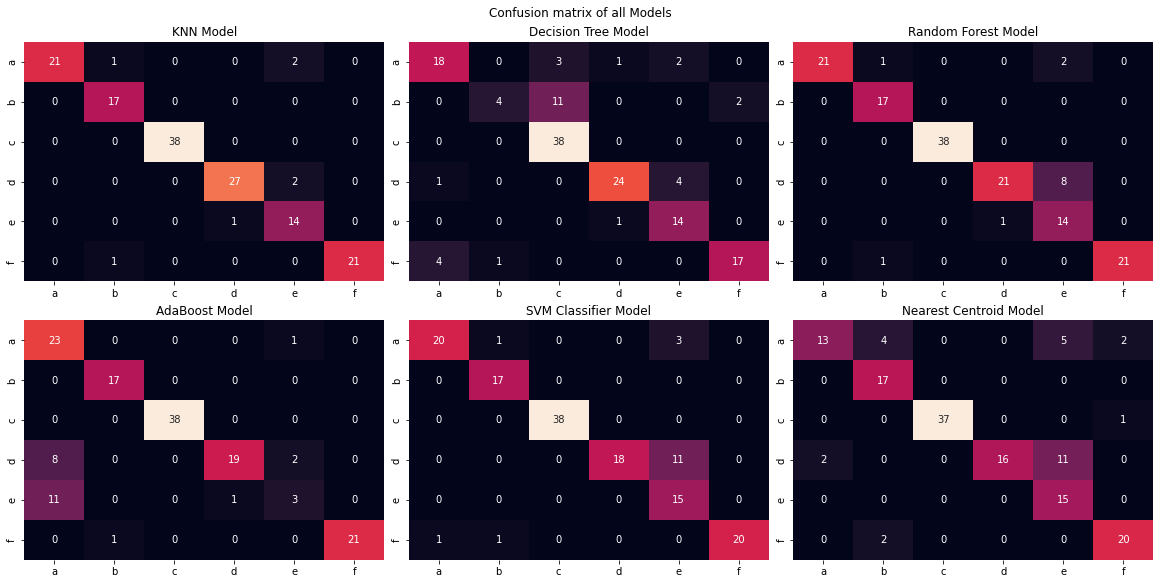

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_knn = pd.DataFrame(confusion_knn, columns=['a','b','c','d','e','f'], index=['a','b','c','d','e','f'])
df_tree = pd.DataFrame(confusion_tree, columns=['a','b','c','d','e','f'], index=['a','b','c','d','e','f'])
df_forest = pd.DataFrame(confusion_forest, columns=['a','b','c','d','e','f'], index=['a','b','c','d','e','f'])
df_ada = pd.DataFrame(confusion_ada, columns=['a','b','c','d','e','f'], index=['a','b','c','d','e','f'])
df_svc = pd.DataFrame(confusion_svc, columns=['a','b','c','d','e','f'], index=['a','b','c','d','e','f'])
df_centroid = pd.DataFrame(confusion_centroid, columns=['a','b','c','d','e','f'], index=['a','b','c','d','e','f'])
# ax1 = sns.heatmap(data=df_knn, cmap="YlGnBu", annot=True, linewidths=0.5)


fig = plt.figure(figsize=(16, 8), layout='constrained') # create figure

ax0 = fig.add_subplot(2, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)

# Subplot 1: Box plot
sns.heatmap(df_knn, ax=ax0, annot=True, cbar=False)
ax0.set_title('KNN Model')

# Subplot 2: Line plot
sns.heatmap(df_tree, ax=ax1, annot=True, cbar=False)
ax1.set_title ('Decision Tree Model')

# Subplot 3: Line plot
sns.heatmap(df_forest, ax=ax2, annot=True, cbar=False)
ax2.set_title ('Random Forest Model')

# Subplot 4: Line plot
sns.heatmap(df_ada, ax=ax3, annot=True, cbar=False)
ax3.set_title ('AdaBoost Model')

# Subplot 5: Line plot
sns.heatmap(df_svc, ax=ax4, annot=True, cbar=False)
ax4.set_title ('SVM Classifier Model')

# Subplot 2: Line plot
sns.heatmap(df_centroid, ax=ax5, annot=True, cbar=False)
ax5.set_title ('Nearest Centroid Model')

fig.suptitle('Confusion matrix of all Models')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_set_labels_enc, neigh_predictions)
rmse = np.sqrt(mse)
rmse

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# scores = cross_val_score(neigh, test_set_features, test_set_labels_enc, scoring ='neg_mean_squared_error', cv=10)
# predict_labels = cross_val_predict(neigh,test_set_features, test_set_labels_enc, cv=10)
scores = cross_val_score(neigh, test_set_features_scaled, test_set_labels_enc, scoring ='neg_mean_squared_error', cv=10)
predict_labels = cross_val_predict(neigh, test_set_features_scaled, test_set_labels_enc, cv=10)

In [ ]:
def display_scores(scores):
    print('Results: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

print(display_scores(scores))
